### Assignment 3: EDA and Prediction with Logistic Regression 

### You must push a version before next Thursday at class time! 

### The Heart Disease Prediction dataset provides vital insight in the relationship between risk factors and cardiac health. This dataset contains 270 case studies of individuals classified as either having or not having heart disease based on results from cardiac catheterizations - the gold standard in heart health assessment. Each patient is identified by 13 independent predictive variables revealing their age, sex, chest pain type, blood pressure measurements, cholesterol levels, electrocardiogram results, exercise-induced angina symptoms, and the number of vessels seen on fluoroscopy showing narrowing of their coronary arteries

In [75]:
import pandas as pd  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
heart = pd.read_csv('Heart.csv')

### 2. Use pandas method to summarize the properties of the data. Use `head` and `info` and `.value_counts` and `describe` pandas methods to explore the data. 
### Identify which variables are categorical, and which variables are numeric.For categorical data, use `.value_counts` to identify any variables that are highly imbalanced.  
### Are there any missing data? 
### What is the primary target variable (i.e., variable to predict).  Are there any interesting secondary variables to predict? 
### After your exploration, write a few sentences in a markdown box to comment on these questions.  

In [9]:
heart.head(5)
heart.keys()
heart.info()
# How many data-points do we have?
print ("Number of data-points:",heart.shape[0])

# How many features do we have?
print ("Number of features:",heart.shape[1]-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB
Number of data-points: 303
Number of features: 14


In [13]:
heart["ChestPain"].value_counts()


asymptomatic    144
nonanginal       86
nontypical       50
typical          23
Name: ChestPain, dtype: int64

In [15]:
missing_values_count = heart.isnull().sum()
print(missing_values_count)

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64


In [17]:
heart.describe()
heart.nunique()


Unnamed: 0    303
Age            41
Sex             2
ChestPain       4
RestBP         50
Chol          152
Fbs             2
RestECG         3
MaxHR          91
ExAng           2
Oldpeak        40
Slope           3
Ca              4
Thal            3
AHD             2
dtype: int64

### 2.  Use Seaborn to explore the numeric data graphically. Two goals here. First, are there any variables that are highly correlated with each other.  Second, are there any variables that seem likely to be helpful in building a model that can predict heart disease. Write your hypothesis in the markdown box provided.  

<Figure size 1000x1000 with 0 Axes>

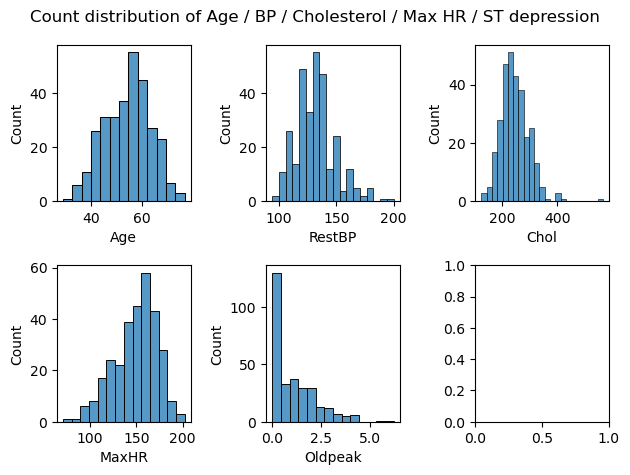

In [20]:
plt.figure(figsize=(10, 10))
fig, ax = plt.subplots(2,3)

sns.histplot(data=heart, x="Age",ax=ax[0, 0])
sns.histplot(data=heart, x="RestBP",ax=ax[0, 1])
sns.histplot(data=heart, x="Chol",ax=ax[0, 2])
sns.histplot(data=heart, x="MaxHR",ax=ax[1, 0])
sns.histplot(data=heart, x="Oldpeak",ax=ax[1, 1])

plt.suptitle("Count distribution of Age / BP / Cholesterol / Max HR / ST depression")
plt.tight_layout()

<Figure size 4000x4000 with 0 Axes>

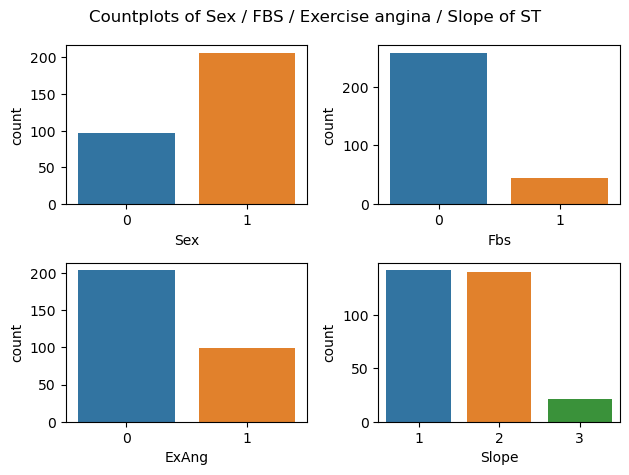

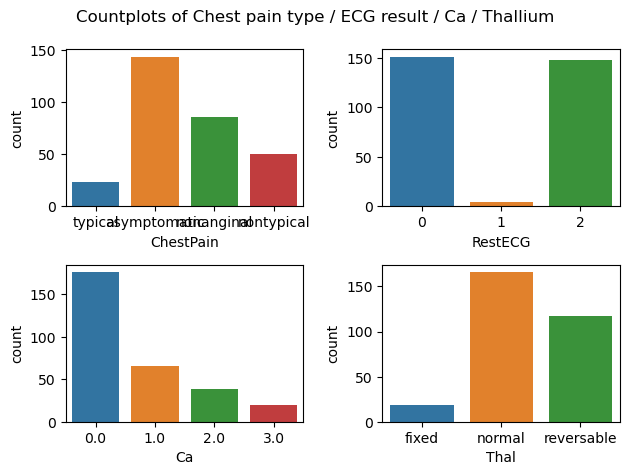

In [26]:
plt.figure(figsize=(40, 40))
fig, ax = plt.subplots(2,2)
sns.countplot(x=heart["Sex"], ax=ax[0, 0])
sns.countplot(x=heart["Fbs"], ax=ax[0, 1])
sns.countplot(x=heart["ExAng"], ax=ax[1, 0])
sns.countplot(x=heart["Slope"], ax=ax[1, 1])

plt.suptitle("Countplots of Sex / FBS / Exercise angina / Slope of ST")
plt.tight_layout()


fig, ax = plt.subplots(2,2)
sns.countplot(x=heart["ChestPain"], ax=ax[0, 0])
sns.countplot(x=heart["RestECG"], ax=ax[0, 1])
sns.countplot(x=heart["Ca"], ax=ax[1, 0])
sns.countplot(x=heart["Thal"], ax=ax[1, 1])

plt.suptitle("Countplots of Chest pain type / ECG result / Ca / Thallium")
plt.tight_layout()


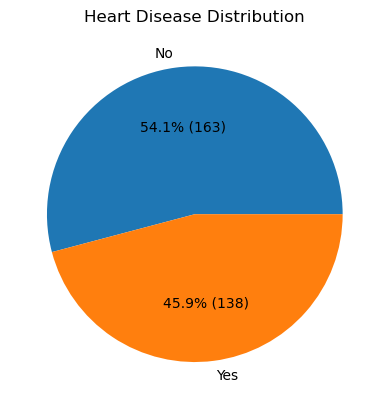

In [25]:
heart["AHD"].value_counts()
counts = heart["AHD"].value_counts().to_dict()
total = sum(counts.values())

fig, ax = plt.subplots()
ax.pie(counts.values(), labels=counts.keys(), autopct=lambda pct: '{:.1f}% ({:d})'.format(pct, int(pct*total/100)))
ax.set_title("Heart Disease Distribution")

plt.show()

C:\Users\19092\AppData\Local\Temp\ipykernel_24788\1255803145.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(predictors.corr(), vmin=-1, vmax=1, cmap= "jet",annot=True)


<Axes: >

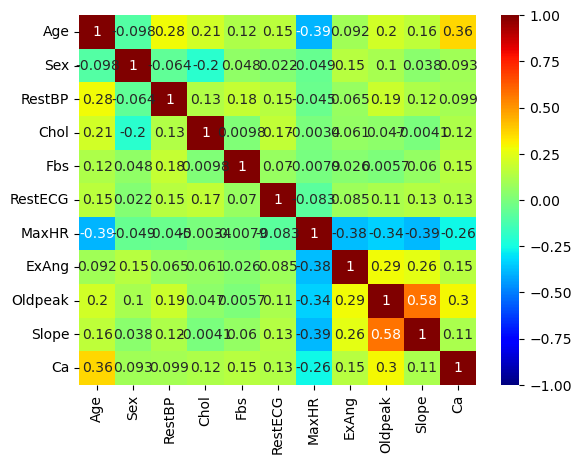

In [32]:
cols = heart.columns
heart["AHD"].value_counts()
heart_disease = heart['AHD']
predictors = heart[cols[1:13]]
sns.heatmap(predictors.corr(), vmin=-1, vmax=1, cmap= "jet",annot=True)


### 3. As the analysis plan is to use a Logistic Regression model, all variables will need to be converted to numeric representations. One way to do this is `pd.get_dummies` which I give an example below. The other way to do it is to use .map method and define an encoder. 

### I show both approaches below.  Typically, if there is an obvious hierarchical relationship, I might use my own encoder to express that.  If there isnt, get_dummies is more sensible then a hierarchical approach

### After you encode the heart data, feel free to delete my example code.  

In [76]:
heart = heart.dropna()
yn_hd = {"AHD":     {"Yes": 1, "No": 0}}
heart = heart.replace(yn_hd)
heart.head()
heart_dummy = pd.get_dummies(heart)
display(heart, heart_dummy)

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,298,57,0,asymptomatic,140,241,0,0,123,1,0.2,2,0.0,reversable,1
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,1
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,1
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,1


,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,1,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,0,0,1,1,0,0
1,2,67,1,160,286,0,2,108,1,1.5,2,3.0,1,1,0,0,0,0,1,0
2,3,67,1,120,229,0,2,129,1,2.6,2,2.0,1,1,0,0,0,0,0,1
3,4,37,1,130,250,0,0,187,0,3.5,3,0.0,0,0,1,0,0,0,1,0
4,5,41,0,130,204,0,2,172,0,1.4,1,0.0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,298,57,0,140,241,0,0,123,1,0.2,2,0.0,1,1,0,0,0,0,0,1
298,299,45,1,110,264,0,0,132,0,1.2,2,0.0,1,0,0,0,1,0,0,1
299,300,68,1,144,193,1,0,141,0,3.4,2,2.0,1,1,0,0,0,0,0,1
300,301,57,1,130,131,0,0,115,1,1.2,2,1.0,1,1,0,0,0,0,0,1


In [83]:
cols = [col for col in heart_dummy.columns if col != 'AHD']
heart["AHD"].value_counts()
heart_disease = heart['AHD']
predictors = heart_dummy[cols[1:19]]
print(predictors)


     Age  Sex  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  Slope   Ca  \
0     63    1     145   233    1        2    150      0      2.3      3  0.0   
1     67    1     160   286    0        2    108      1      1.5      2  3.0   
2     67    1     120   229    0        2    129      1      2.6      2  2.0   
3     37    1     130   250    0        0    187      0      3.5      3  0.0   
4     41    0     130   204    0        2    172      0      1.4      1  0.0   
..   ...  ...     ...   ...  ...      ...    ...    ...      ...    ...  ...   
297   57    0     140   241    0        0    123      1      0.2      2  0.0   
298   45    1     110   264    0        0    132      0      1.2      2  0.0   
299   68    1     144   193    1        0    141      0      3.4      2  2.0   
300   57    1     130   131    0        0    115      1      1.2      2  1.0   
301   57    0     130   236    0        2    174      0      0.0      2  1.0   

     ChestPain_asymptomatic  ChestPain_

### 4. We are going to have to decide how we want to cross-validate the models we build. First split the data into training and test data (using `train_test_split`). I recommend 25% test set data.   Then using the training data only, make use of K-fold cross validation to create multiple training and test sets. I recommend doing 5-folds.    

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

predictors_train, predictors_test, hd_train, hd_test = train_test_split(predictors, heart_disease, test_size=0.25, random_state=42)


In [94]:
logreg = LogisticRegression(random_state=16,max_iter = 5000)
logreg.fit(predictors_train, hd_train)
hd_pred = logreg.predict(predictors_test)
print(hd_pred)

correct = (hd_pred==hd_test)
ncorrect = np.sum(correct)
pctcorrect = 100*ncorrect/len(hd_test)
print(pctcorrect)

from sklearn.model_selection import KFold
kf = KFold(n_splits=2, random_state=20, shuffle=True) # 
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

[0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1
 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0
 1]
89.33333333333333
  Train: index=[2 3]
  Test:  index=[0 1]
  Train: index=[0 1]
  Test:  index=[2 3]


In [106]:
hd_kfold_pred = np.zeros(len(heart_disease))
kf = KFold(n_splits=5, random_state=20, shuffle=True) #
predictors = np.array(predictors)
heart_disease = np.array(heart_disease)
for train_index, test_index in kf.split(predictors):
    logreg.fit(predictors[train_index,:], heart_disease[train_index])
    hd_kfold_pred[test_index] = logreg.predict(predictors[test_index])

class_names=['Undiagnosed','Heart Disease'] # name  of classes
print(metrics.classification_report(heart_disease,hd_kfold_pred,target_names=class_names))

model = pd.DataFrame(logreg.coef_,columns = cols[1:19])
model.head()   

               precision    recall  f1-score   support

  Undiagnosed       0.82      0.88      0.85       160
Heart Disease       0.85      0.77      0.81       137

     accuracy                           0.83       297
    macro avg       0.83      0.83      0.83       297
 weighted avg       0.83      0.83      0.83       297



,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,-0.01463,1.089739,0.027533,0.004492,-0.658031,0.296996,-0.021465,0.529038,0.354613,0.503695,1.201242,0.963287,-0.702123,0.057096,-0.335554,-0.41196,-0.458593,0.85326


### 5. Fit a logistic regression model on the training data using K-fold cross-validation to first assess model fit. Your assessment should include accuracy, confusion matrix, and ROC curve.     

[[39  3]
 [ 5 28]]
               precision    recall  f1-score   support

  Undiagnosed       0.89      0.93      0.91        42
Heart Disease       0.90      0.85      0.88        33

     accuracy                           0.89        75
    macro avg       0.89      0.89      0.89        75
 weighted avg       0.89      0.89      0.89        75



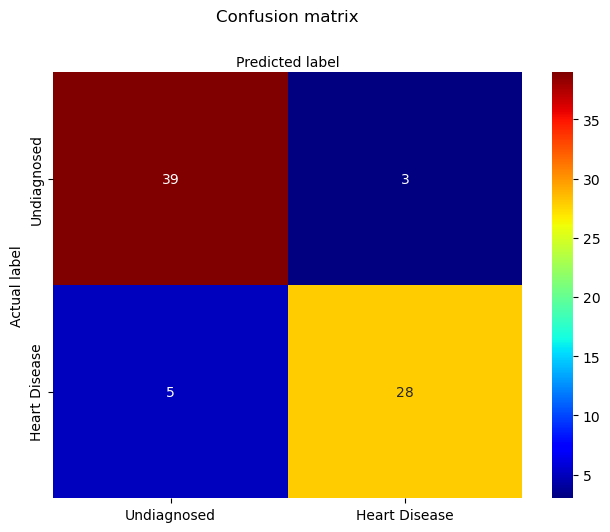

In [99]:
cnf_matrix = metrics.confusion_matrix(hd_test, hd_pred)
print(cnf_matrix)

class_names=['Undiagnosed','Heart Disease'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="jet" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(tick_marks+0.5, class_names)
plt.yticks(tick_marks+0.5, class_names)

print(metrics.classification_report(hd_test,hd_pred,target_names=class_names))


Text(0, 0.5, 'Probability of Heart Disease')

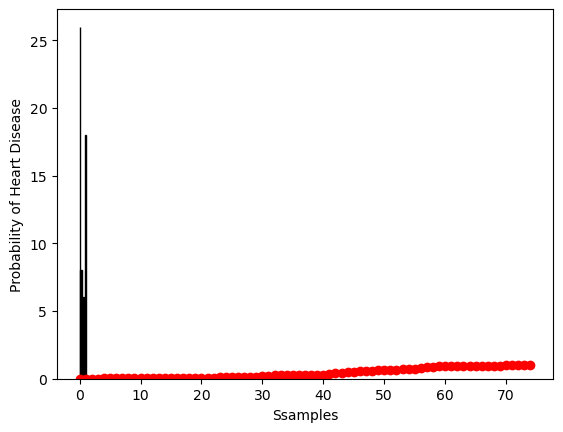

In [101]:
hd_pprob = logreg.predict_proba(predictors_test)
sns.histplot(hd_pprob[:,1])

plt.plot(np.sort(hd_pprob[:,1]),'ro')
plt.xlabel('Samples')
plt.ylabel('Probability of Heart Disease')


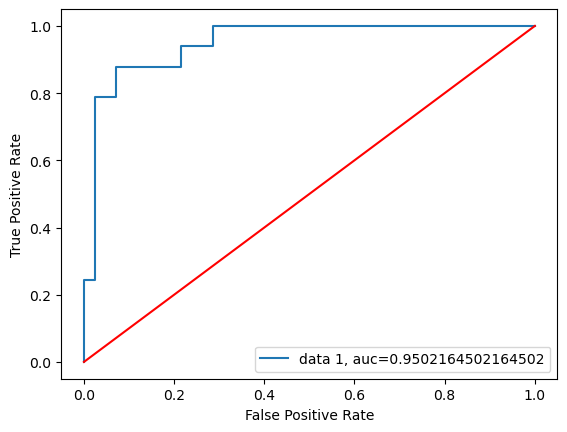

In [102]:
fpr, tpr, _ = metrics.roc_curve(hd_test,  hd_pprob[:,1])
auc = metrics.roc_auc_score(hd_test, hd_pprob[:,1])
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0,1],[0,1],'r-')
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [105]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() #This initializes the StandardScaler 
predictors = heart_dummy[cols[1:19]]
predictors_scaled = pd.DataFrame(ss.fit_transform(predictors),columns = predictors.columns)
predictors_scaled.head()
print(metrics.classification_report(hd_test,hd_pred,target_names=class_names))


               precision    recall  f1-score   support

  Undiagnosed       0.89      0.93      0.91        42
Heart Disease       0.90      0.85      0.88        33

     accuracy                           0.89        75
    macro avg       0.89      0.89      0.89        75
 weighted avg       0.89      0.89      0.89        75



### 6. Fit a logistic regression model using all the training data and test it on the test data.  Provide accuracy, confusion matrix, and ROC curve.

### 7.Examine your model to determine if you can understand what features and criterion it is using to classify the data. Write your descriptive answer in the markdown box.   